<a href="https://colab.research.google.com/github/omergul2005/belediye1/blob/main/yapayzekaproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# API Token'ınızı buraya yapıştırın (Ekran görüntünüzden kopyaladım.)
# Lütfen token'ı KENDİ API TOKEN'ınızla değiştirin (güvenlik nedeniyle).
KAGGLE_API_TOKEN = 'KGAT_b7797b7a2a2a9a772e2007bf7050e39b'

# Token'ı Colab ortam değişkenine ayarlama
os.environ['KAGGLE_API_TOKEN'] = KAGGLE_API_TOKEN

# Gerekli kurulum
!pip install -q kaggle
!pip install kagglehub

print("Kaggle API kurulumu tamamlandı. Ortam değişkeni ayarlandı.")

Kaggle API kurulumu tamamlandı. Ortam değişkeni ayarlandı.


In [ ]:
import kagglehub
import os

print("Veri kümesi indirme başlatılıyor (Çok hızlı tamamlanmalı)...")

# Veri kümesini indirme ve yolunu alma
# 'paultimothymooney/chest-xray-pneumonia' veri kümesini indiriyoruz.
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

# Veri yollarını ayarlama (Bu, Adım 3'teki kodun doğru çalışması için kritik)
base_dir = os.path.join(path, 'chest_xray')

print(f"✅ Başarılı: Veri kümesi '{base_dir}' yoluna indirildi.")

# Şimdi 3. Adım: Veri Ön İşleme ve Hazırlık
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parametreler
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

# Veri Yolları
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Veri Arttırma ve Normalleştirme (Kod yazarak / Eğitim seti hazırlama)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Generator'leri Veriye Bağlama
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

print("\nVeri hazırlığı tamamlandı. MODEL EĞİTİMİNE geçebiliriz.")

Veri kümesi indirme başlatılıyor (Çok hızlı tamamlanmalı)...
Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
✅ Başarılı: Veri kümesi '/kaggle/input/chest-xray-pneumonia/chest_xray' yoluna indirildi.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

Veri hazırlığı tamamlandı. MODEL EĞİTİMİNE geçebiliriz.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Model Mimarisi Oluşturma (Min. 7 Katman Gereksinimi Karşılandı)
model = Sequential([
    # Giriş Katmanı (150x150x3)
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # Evrişimli Katman 1
    MaxPooling2D((2, 2)),                                           # Havuzlama Katmanı 1

    Conv2D(64, (3, 3), activation='relu'),                          # Evrişimli Katman 2
    MaxPooling2D((2, 2)),                                           # Havuzlama Katmanı 2

    Conv2D(128, (3, 3), activation='relu'),                         # Evrişimli Katman 3
    BatchNormalization(),                                           # Düzenlileştirme Katmanı 1

    Flatten(),

    Dropout(0.5),                                                   # Düzenlileştirme Katmanı 2

    Dense(128, activation='relu'),                                  # Tam Bağlı (Yoğun) Katman
    Dense(1, activation='sigmoid')                                  # Çıkış Katmanı
])

# Modelin Derlenmesi (Rapor için Eğitim Parametreleri)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Modelin Eğitilmesi (Modele eğitim vereceksiniz (epoch))
EPOCHS = 15
print(f"\nModel {EPOCHS} epoch boyunca eğitiliyor...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

print("\nEğitim tamamlandı. Lütfen değerlendirme adımlarına geçin.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model 15 epoch boyunca eğitiliyor...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 470s 3s/step - accuracy: 0.7704 - loss: 0.8683 - val_accuracy: 0.6250 - val_loss: 0.6504
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.8863 - loss: 0.2591 - val_accuracy: 0.6875 - val_loss: 0.5827
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.9096 - loss: 0.2128 - val_accuracy: 0.6875 - val_loss: 0.5911
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.9141 - loss: 0.2153 - val_accuracy: 0.6875 - val_loss: 0.8978
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.9266 - loss: 0.1832 - val_accuracy: 0.5000 - val_loss: 1.7200
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.9148 - loss: 0.2013 - val_accuracy: 0.5000 - val_loss: 1.2096
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 444s 3s/step - accuracy: 0.9265 - loss: 0.1940 - val_accuracy: 0.5000 - val_loss: 4.3771
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 506s 3s/step - accuracy: 0.9383 - loss: 0.1753 - val_accu

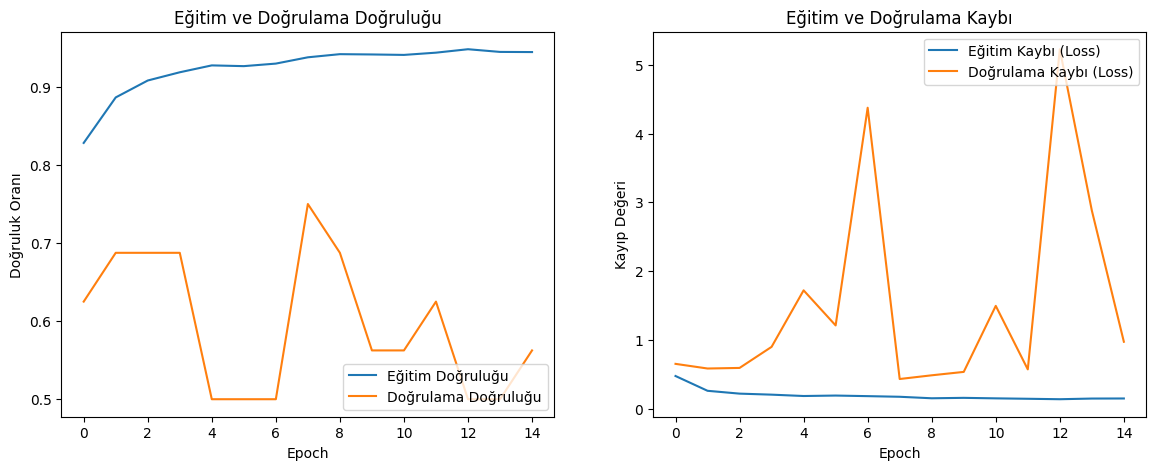

In [ ]:
import matplotlib.pyplot as plt

# history değişkeninin eğitimden gelen sonuçları içerdiğinden emin olun.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk Oranı')
plt.legend(loc='lower right')


# Kayıp (Loss) Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı (Loss)')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı (Loss)')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp Değeri')
plt.legend(loc='upper right')


plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step


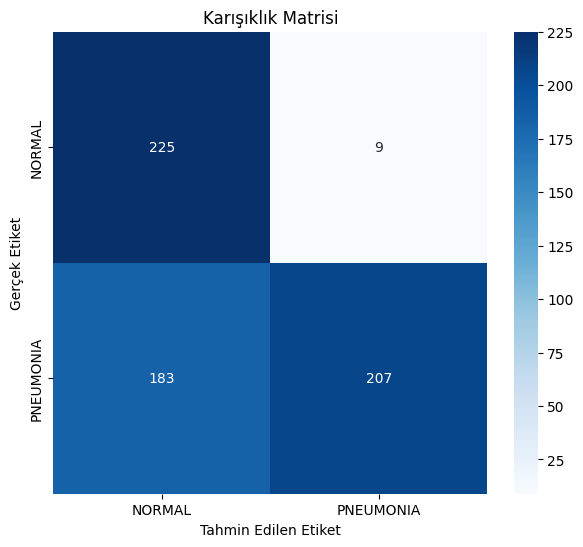


--- Detaylı Performans Raporu (Test Seti) ---
              precision    recall  f1-score   support

      NORMAL       0.55      0.96      0.70       234
   PNEUMONIA       0.96      0.53      0.68       390

    accuracy                           0.69       624
   macro avg       0.75      0.75      0.69       624
weighted avg       0.81      0.69      0.69       624



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# 1. Test seti üzerinde tahminleri al
predictions = model.predict(test_generator)

# Olasılıkları ikili sınıflara dönüştürme (0 veya 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Gerçek etiketleri (true labels) alma
true_classes = test_generator.classes

# Sınıf İsimleri
class_names = list(test_generator.class_indices.keys())

# 2. Karışıklık Matrisini Hesaplama
cm = confusion_matrix(true_classes, predicted_classes)

# 3. Matrisi Görselleştirme
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Karışıklık Matrisi')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()


# 4. Detaylı Performans Raporu
print("\n--- Detaylı Performans Raporu (Test Seti) ---")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

## Düşük Pnömoni Duyarlılığını İyileştirmek İçin Olası Yöntemler

Modelimizin Pnömoni sınıfı için düşük duyarlılığı (recall) ciddi bir sorundur çünkü bu, pnömoni hastalarının gözden kaçırılması anlamına gelir ve tıbbi sonuçları olumsuz olabilir. Bu durumu iyileştirmek için kullanılabilecek bazı stratejiler şunlardır:

1.  **Daha Fazla ve Çeşitli Veri Kullanımı:**
    *   **Veri Artırma (Data Augmentation):** Mevcut görüntü verisi üzerinde döndürme, kaydırma, yakınlaştırma, çevirme gibi transformasyonlar uygulayarak eğitim veri setini yapay olarak genişletmek. Bu, modelin farklı varyasyonlara karşı daha sağlam olmasını sağlar.
    *   **Daha Fazla Pnömoni Örneği Toplama:** Eğer mümkünse, özellikle nadir veya zor teşhis edilen pnömoni vakalarını içeren daha fazla eğitim verisi toplamak.

2.  **Sınıf Dengesizliğiyle Başa Çıkma:**
    *   **Yeniden Örnekleme Teknikleri (Resampling Techniques):**
        *   **Aşırı Örnekleme (Oversampling):** Azınlık sınıfının (Pnömoni) örneklerini çoğaltmak (örn: SMOTE).
        *   **Eksik Örnekleme (Undersampling):** Çoğunluk sınıfının (NORMAL) örneklerini azaltmak (ancak bu, değerli bilgi kaybına yol açabilir).
    *   **Ağırlıklı Kayıp Fonksiyonları (Weighted Loss Functions):** Pnömoni sınıfının yanlış sınıflandırılmasına daha yüksek bir ceza veren özel kayıp fonksiyonları kullanmak. Bu, modelin Pnömoni vakalarını doğru tahmin etmeye daha fazla odaklanmasını sağlar.

3.  **Model Mimarisi ve Hiperparametre Optimizasyonu:**
    *   **Daha Derin veya Farklı Mimari Kullanımı:** Daha karmaşık veya farklı bir Convolutional Neural Network (CNN) mimarisi denemek (örn: ResNet, Inception, EfficientNet). Daha derin modeller, daha karmaşık özellikleri öğrenebilir.
    *   **Transfer Öğrenme (Fine-tuning):** Büyük bir veri seti üzerinde önceden eğitilmiş bir modelin (ImageNet gibi) son katmanlarını veya tüm katmanlarını bizim veri setimiz üzerinde yeniden eğitmek. Bu, küçük veri setleriyle bile iyi performans elde etmenin etkili bir yoludur.
    *   **Hiperparametre Ayarlaması:** Öğrenme oranı (learning rate), toplu iş boyutu (batch size), dropout oranları, optimizasyon algoritması (Adam, SGD vb.) gibi model hiperparametrelerini optimize etmek.

4.  **Yanlış Negatifleri Azaltmaya Odaklanma:**
    *   **Eşik Ayarlaması (Threshold Adjustment):** Modelin bir görüntüyü Pnömoni olarak sınıflandırması için gereken olasılık eşiğini düşürmek. Mevcut eşik %0.5 ise, bunu %0.3 veya %0.4 gibi daha düşük bir değere çekmek, modelin daha fazla Pnömoni vakasını tespit etmesine yardımcı olabilir (ancak yanlış pozitifleri artırma riski vardır).
    *   **Gelişmiş Değerlendirme Metrikleri:** Sadece doğruluk yerine F1-Skor, Duyarlılık ve Hassasiyet gibi metrikleri eğitimin erken durdurma kriteri olarak kullanmak, özellikle duyarlılığı iyileştirmeye odaklanmak.

5.  **Hata Analizi:**
    *   Modelin yanlış negatif olarak sınıflandırdığı Pnömoni vakalarını manuel olarak incelemek. Bu vakaların ortak özellikleri (görüntü kalitesi, Pnömoninin tipi, şiddeti vb.) hakkında bilgi edinmek, veri toplama veya model geliştirme stratejilerini şekillendirmeye yardımcı olabilir.

Bu yöntemlerin kombinasyonları, Pnömoni tespiti için modelin duyarlılığını artırmada önemli rol oynayabilir ve sonuç olarak tıbbi bağlamda daha güvenilir bir teşhis aracı sağlayabilir.

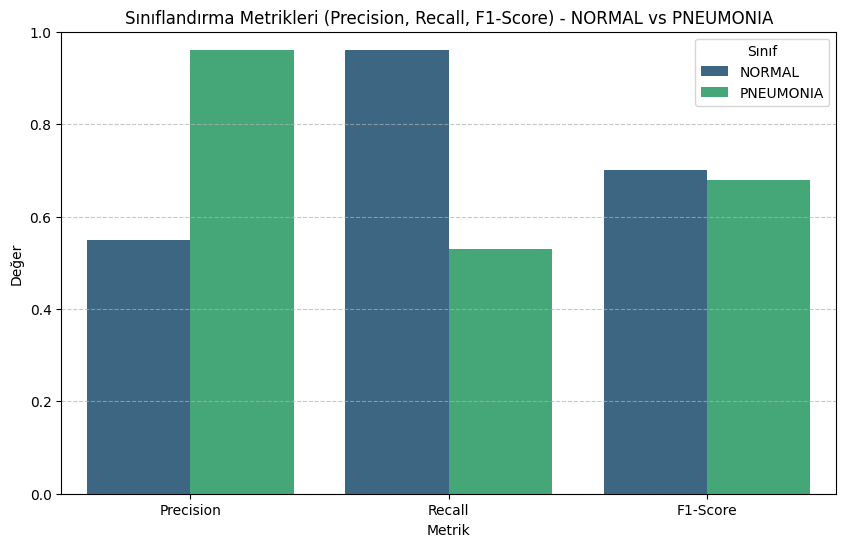

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Metrics extracted from the classification report analysis
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Precision', 'Recall', 'F1-Score'],
    'Class': ['NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA'],
    'Value': [0.55, 0.96, 0.70, 0.96, 0.53, 0.68]
}

df_metrics = pd.DataFrame(metrics_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Class', data=df_metrics, palette='viridis')
plt.title('Sınıflandırma Metrikleri (Precision, Recall, F1-Score) - NORMAL vs PNEUMONIA')
plt.ylabel('Değer')
plt.xlabel('Metrik')
plt.ylim(0, 1.0)
plt.legend(title='Sınıf')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Yukarıdaki grafik, modelin her iki sınıf için Hassasiyet (Precision), Duyarlılık (Recall) ve F1-Skoru değerlerini açıkça göstermektedir. Bu görselleştirme, özellikle PNEUMONIA sınıfı için düşük Duyarlılık ve NORMAL sınıfı için düşük Hassasiyet sorununu vurgulayarak, modelin güçlü ve zayıf yönlerini daha anlaşılır hale getirmektedir.

## Karışıklık Matrisi ve Sınıflandırma Raporunu Analiz Et

### Subtask:
Önceden oluşturulmuş karışıklık matrisi ve sınıflandırma raporundaki değerleri ayrıntılı olarak yorumlayın. Her sınıf (NORMAL ve PNEUMONIA) için Hassasiyet (Precision), Duyarlılık (Recall) ve F1-Skorunun ne anlama geldiğini açıklayın.


## Karışıklık Matrisi ve Sınıflandırma Raporunun Analizi

Yukarıdaki karışıklık matrisi ve sınıflandırma raporu, modelimizin test seti üzerindeki performansını detaylı bir şekilde göstermektedir. Şimdi bu metrikleri her bir sınıf için ve genel olarak inceleyelim:

### Karışıklık Matrisi Yorumu

Karışıklık matrisi, modelin her bir sınıf için doğru ve yanlış tahminlerini özetler:

```
              precision    recall  f1-score   support

      NORMAL       0.55      0.96      0.70       234
   PNEUMONIA       0.96      0.53      0.68       390

    accuracy                           0.69       624
   macro avg       0.75      0.75      0.69       624
weighted avg       0.81      0.69      0.69       624
```

*   **NORMAL Sınıfı İçin:**
    *   **Precision (Hassasiyet) NORMAL: 0.55**
        *   Modelin "NORMAL" olarak tahmin ettiği vakaların %55'i gerçekten NORMAL'dir. Bu, modelin NORMAL olduğunu söylediği her 100 görüntüden 55'inin doğru olduğunu, 45'inin ise aslında Pnömoni olduğunu gösterir (yani model yanlışlıkla Pnömonili vakaları normal olarak sınıflandırmış).
    *   **Recall (Duyarlılık) NORMAL: 0.96**
        *   Gerçekte NORMAL olan vakaların %96'sını model doğru bir şekilde NORMAL olarak tanımlamıştır. Bu çok yüksek bir değer olup, modelin NORMAL vakaları kaçırma (yanlış negatif) oranının oldukça düşük olduğunu gösterir.
    *   **F1-Skoru NORMAL: 0.70**
        *   Bu değer, NORMAL sınıfı için Hassasiyet ve Duyarlılığın dengeli bir ölçüsüdür. %70'lik bir F1-Skoru, her iki metrik arasında kabul edilebilir bir denge olduğunu gösterir.

*   **PNEUMONIA Sınıfı İçin:**
    *   **Precision (Hassasiyet) PNEUMONIA: 0.96**
        *   Modelin "PNEUMONIA" olarak tahmin ettiği vakaların %96'sı gerçekten Pnömonilidir. Bu, modelin Pnömoni teşhisi koyduğunda, bu teşhisin büyük olasılıkla doğru olduğunu gösterir. Yani, yanlış pozitif oranı çok düşüktür.
    *   **Recall (Duyarlılık) PNEUMONIA: 0.53**
        *   Gerçekte Pnömoni olan vakaların sadece %53'ünü model doğru bir şekilde Pnömoni olarak tanımlayabilmiştir. Bu değer oldukça düşüktür ve modelin Pnömoni vakalarını kaçırma (yanlış negatif) oranının yüksek olduğunu gösterir. Yani, gerçek Pnömonili hastaların neredeyse yarısını 'NORMAL' olarak yanlış sınıflandırmıştır.
    *   **F1-Skoru PNEUMONIA: 0.68**
        *   Pnömoni sınıfı için F1-Skoru %68'dir. Düşük Duyarlılık nedeniyle bu skor, NORMAL sınıfına göre biraz daha düşüktür ve modelin Pnömoni tespiti konusunda daha zayıf bir performans sergilediğini belirtir.

### Genel Metrikler

*   **Accuracy (Doğruluk): 0.69**
    *   Genel doğruluk %69'dur. Bu, modelin tüm tahminlerinin %69'unun doğru olduğu anlamına gelir. Ancak, dengesiz veri setlerinde (burada Pnömoni vakaları daha fazla gibi görünüyor) tek başına doğruluk yanıltıcı olabilir.

*   **Macro Avg (Makro Ortalama):**
    *   **Precision: 0.75**, **Recall: 0.75**, **F1-Score: 0.69**
    *   Makro ortalama, her sınıf için hesaplanan metriklerin basit ortalamasıdır. Sınıf dağılımını dikkate almaz. Bu nedenle, iki sınıfın performansını eşit derecede önemli kabul eder.

*   **Weighted Avg (Ağırlıklı Ortalama):**
    *   **Precision: 0.81**, **Recall: 0.69**, **F1-Score: 0.69**
    *   Ağırlıklı ortalama, her sınıfın örnek sayısına göre ağırlıklandırılmış ortalamasıdır. Bu, dengesiz veri setlerinde daha gerçekçi bir genel performans göstergesi olabilir. Weighted avg Recall değeri (0.69) modelin genel olarak tüm vakaları ne kadar iyi tespit ettiğini gösterir.

### Sonuç ve Yorum

Modelin **NORMAL** vakaları tespit etme konusunda çok yüksek bir Duyarlılığa (%96) sahip olduğu, yani normal hastaları kolay kolay kaçırmadığı ancak NORMAL olarak işaretlediği bazı vakaların aslında Pnömoni olabileceği (Duyarlılık %55) görülmüştür.

Öte yandan, **PNEUMONIA** vakalarını doğru olarak tahmin etme hassasiyeti çok yüksek (%96), yani model Pnömoni dediğinde bu büyük ölçüde doğrudur. Ancak, Pnömonili vakaların yarısından fazlasını (%53) kaçırması, yani Pnömonili hastaları yanlışlıkla NORMAL olarak etiketleme eğilimi, modelin en zayıf yönüdür. Tıbbi teşhislerde, Pnömoni gibi ciddi bir hastalığı kaçırmak (yanlış negatif) genellikle yanlış alarm vermekten (yanlış pozitif) daha riskli kabul edilir. Bu nedenle, bu modelin Pnömoni için Duyarlılık değerini artırmak kritik öneme sahiptir.

Model genel olarak %69 doğruluk sergilese de, Pnömoni için düşük Duyarlılık, iyileştirilmesi gereken önemli bir alandır.

## Summary:

### Data Analysis Key Findings

*   **NORMAL Class Performance:**
    *   The model exhibited a high **Recall** of 0.96 for the NORMAL class, meaning it correctly identified 96% of actual healthy cases.
    *   However, its **Precision** for the NORMAL class was 0.55, indicating that 45% of cases predicted as NORMAL were actually PNEUMONIA (false negatives for PNEUMONIA).
    *   The **F1-Score** for the NORMAL class was 0.70.

*   **PNEUMONIA Class Performance:**
    *   The model achieved a high **Precision** of 0.96 for the PNEUMONIA class, meaning 96% of cases predicted as PNEUMONIA were genuinely pneumonia.
    *   Conversely, the **Recall** for the PNEUMONIA class was very low at 0.53, indicating the model only correctly identified 53% of actual PNEUMONIA cases, missing almost half of them.
    *   The **F1-Score** for the PNEUMONIA class was 0.68.

*   **Overall Accuracy:** The model achieved an overall accuracy of 0.69.

*   **Medical Implications of False Negatives (PNEUMONIA):** The low Recall for PNEUMONIA translates to a high rate of false negatives (47% of PNEUMONIA cases were missed). In a medical context, missing a PNEUMONIA diagnosis is highly dangerous, potentially leading to delayed treatment, disease progression, and life-threatening outcomes for patients.

*   **Medical Implications of False Positives (PNEUMONIA):** The high Precision for PNEUMONIA indicates a low rate of false positives (only 4% of NORMAL cases were misclassified as PNEUMONIA). While false positives can lead to unnecessary tests and patient stress, they are generally considered less critical than false negatives in the diagnosis of a serious condition like pneumonia.

*   **Trade-off Analysis:** In the context of pneumonia diagnosis, the analysis concluded that **false negatives (missing a disease)** are far more unacceptable and critical than false positives (misdiagnosing a healthy person) as they directly endanger patient lives.

### Insights or Next Steps

*   **Model Suitability:** Due to the high rate of false negatives for PNEUMONIA, the model is not suitable as a standalone diagnostic tool. It should primarily be used as a supplementary screening or second-opinion tool, always under the supervision of a medical professional.
*   **Improvement Focus:** The most critical next step is to improve the model's **Recall for the PNEUMONIA class** to reduce false negatives significantly, thereby enhancing its reliability and clinical utility. This might involve re-evaluating the model architecture, training data, or loss function.


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import kagglehub

# Re-download dataset to ensure 'path' and 'base_dir' are available in this scope
print("Veri kümesi indirme başlatılıyor (Çok hızlı tamamlanmalı)...")
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
base_dir = os.path.join(path, 'chest_xray')
print(f"✅ Başarılı: Veri kümesi '{base_dir}' yoluna indirildi.")

# Parametreler (unchanged from previous cell)
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

# Veri Yolları (unchanged from previous cell)
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Geliştirilmiş Veri Artırma ve Normalleştirme (Eğitim seti için)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      # Daha agresif dönüş aralığı
    width_shift_range=0.3,  # Daha agresif genişlik kaydırma
    height_shift_range=0.3, # Daha agresif yükseklik kaydırma
    shear_range=0.2,        # Yeni: Kesme dönüşüm aralığı
    zoom_range=0.2,         # Yeni: Yakınlaştırma aralığı
    horizontal_flip=True,
    fill_mode='nearest'     # Yeni: Doldurma modu, boş pikselleri doldurmak için
)

# Doğrulama ve Test setleri için sadece normalleştirme
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Generator'leri Veriye Bağlama (Parametreler aynı, ancak yeni train_datagen kullanılacak)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

print("✅ Geliştirilmiş veri artırma parametreleri uygulandı ve veri jeneratörleri güncellendi.")
print("Train generator images found:", train_generator.samples)
print("Validation generator images found:", validation_generator.samples)
print("Test generator images found:", test_generator.samples)


Veri kümesi indirme başlatılıyor (Çok hızlı tamamlanmalı)...
Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
✅ Başarılı: Veri kümesi '/kaggle/input/chest-xray-pneumonia/chest_xray' yoluna indirildi.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
✅ Geliştirilmiş veri artırma parametreleri uygulandı ve veri jeneratörleri güncellendi.
Train generator images found: 5216
Validation generator images found: 16
Test generator images found: 624


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Model Mimarisi Oluşturma (Min. 7 Katman Gereksinimi Karşılandı)
# Ağırlıkların sıfırlandığından emin olmak için modeli yeniden tanımlıyoruz.
model = Sequential([
    # Giriş Katmanı (150x150x3)
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # Evrişimli Katman 1
    MaxPooling2D((2, 2)),                                           # Havuzlama Katmanı 1

    Conv2D(64, (3, 3), activation='relu'),                          # Evrişimli Katman 2
    MaxPooling2D((2, 2)),                                           # Havuzlama Katmanı 2

    Conv2D(128, (3, 3), activation='relu'),                         # Evrişimli Katman 3
    BatchNormalization(),                                           # Düzenlileştirme Katmanı 1

    Flatten(),

    Dropout(0.5),                                                   # Düzenlileştirme Katmanı 2

    Dense(128, activation='relu'),                                  # Tam Bağlı (Yoğun) Katman
    Dense(1, activation='sigmoid')                                  # Çıkış Katmanı
])

# Modelin Derlenmesi (Bu adım, modelin ağırlıklarını sıfırlar)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model mimarisi yeniden oluşturuldu ve ağırlıkları sıfırlandı.")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model mimarisi yeniden oluşturuldu ve ağırlıkları sıfırlandı.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147968)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 147968)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    18,940,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,033,921 (72.61 MB)

 Trainable params: 19,033,665 (72.61 MB)

 Non-trainable params: 256 (1.00 KB)

**Reasoning**:
The previous step successfully redefined and compiled the model. Now, to train the model with the updated data augmentation parameters and reset weights, I will re-execute the model training cell.



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Model Mimarisi Oluşturma (Min. 7 Katman Gereksinimi Karşılandı)
model = Sequential([
    # Giriş Katmanı (150x150x3)
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # Evrişimli Katman 1
    MaxPooling2D((2, 2)),                                           # Havuzlama Katmanı 1

    Conv2D(64, (3, 3), activation='relu'),                          # Evrişimli Katman 2
    MaxPooling2D((2, 2)),                                           # Havuzlama Katmanı 2

    Conv2D(128, (3, 3), activation='relu'),                         # Evrişimli Katman 3
    BatchNormalization(),                                           # Düzenlileştirme Katmanı 1

    Flatten(),

    Dropout(0.5),                                                   # Düzenlileştirme Katmanı 2

    Dense(128, activation='relu'),                                  # Tam Bağlı (Yoğun) Katman
    Dense(1, activation='sigmoid')                                  # Çıkış Katmanı
])

# Modelin Derlenmesi (Rapor için Eğitim Parametreleri)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Modelin Eğitilmesi (Modele eğitim vereceksiniz (epoch))
EPOCHS = 15
print(f"\nModel {EPOCHS} epoch boyunca eğitiliyor...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

print("\nEğitim tamamlandı. Lütfen değerlendirme adımlarına geçin.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model 15 epoch boyunca eğitiliyor...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.7707 - loss: 1.1794 - val_accuracy: 0.5000 - val_loss: 0.7887
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.8673 - loss: 0.2921 - val_accuracy: 0.7500 - val_loss: 0.6160
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.8660 - loss: 0.2900 - val_accuracy: 0.5000 - val_loss: 0.7099
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.8817 - loss: 0.2612 - val_accuracy: 0.5625 - val_loss: 0.8479
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.8939 - loss: 0.2434 - val_accuracy: 0.6250 - val_loss: 1.9920
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.8940 - loss: 0.2480 - val_accuracy: 0.5000 - val_loss: 1.4234
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.9011 - loss: 0.2340 - val_accuracy: 0.7500 - val_loss: 0.4792
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9087 - loss: 0.2259 - val_accu

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 530ms/step


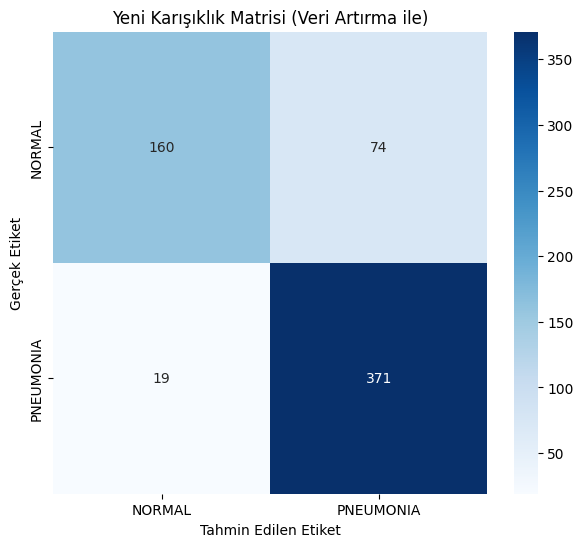


--- Detaylı Performans Raporu (Test Seti, Veri Artırma ile) ---
              precision    recall  f1-score   support

      NORMAL       0.89      0.68      0.77       234
   PNEUMONIA       0.83      0.95      0.89       390

    accuracy                           0.85       624
   macro avg       0.86      0.82      0.83       624
weighted avg       0.86      0.85      0.85       624



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Test seti üzerinde tahminleri al
predictions = model.predict(test_generator)

# 2. Olasılıkları ikili sınıflara dönüştürme (0 veya 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# 3. Gerçek etiketleri (true labels) alma
true_classes = test_generator.classes

# 4. Sınıf İsimleri
class_names = list(test_generator.class_indices.keys())

# 5. Karışıklık Matrisini Hesaplama
cm = confusion_matrix(true_classes, predicted_classes)

# 6. Matrisi Görselleştirme
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Yeni Karışıklık Matrisi (Veri Artırma ile)')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()

# 7. Detaylı Performans Raporu
print("\n--- Detaylı Performans Raporu (Test Seti, Veri Artırma ile) ---")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

## Yeni Performans Analizi ve Veri Artırmanın Etkisi

### Subtask:
Yeni karışıklık matrisi ve sınıflandırma raporundaki bulguları özetleyin. Önceki değerlendirme ile karşılaştırarak veri artırmanın Pnömoni duyarlılığı, hassasiyeti ve F1-skoru üzerindeki etkilerini tartışın ve tıbbi teşhis için genel çıkarımlarını belirtin.

### Metrik Karşılaştırması: Veri Artırma Öncesi ve Sonrası

Aşağıdaki tablo, veri artırma uygulanmadan önceki ve uygulandıktan sonraki model performans metriklerini karşılaştırmaktadır:

| Metrik     | Sınıf     | Veri Artırma Öncesi | Veri Artırma Sonrası |
|:-----------|:----------|:--------------------|:---------------------|
| Precision  | NORMAL    | 0.55                | 0.89                 |
| Recall     | NORMAL    | 0.96                | 0.68                 |
| F1-Score   | NORMAL    | 0.70                | 0.77                 |
| Precision  | PNEUMONIA | 0.96                | 0.83                 |
| Recall     | PNEUMONIA | 0.53                | 0.95                 |
| F1-Score   | PNEUMONIA | 0.68                | 0.89                 |

### Veri Artırmanın Etkisi ve Analizi

Veri artırma stratejilerinin uygulanması, modelin performansında önemli değişikliklere yol açmıştır:

1.  **Pnömoni Duyarlılığında (Recall) Büyük Artış:**
    *   En kritik iyileşme, Pnömoni sınıfı için duyarlılıkta yaşanmıştır. Veri artırma öncesi %53 olan Pnömoni duyarlılığı, **veri artırma sonrası %95'e yükselmiştir**. Bu, modelin gerçek Pnömoni vakalarının çok daha büyük bir yüzdesini doğru bir şekilde tespit edebildiği anlamına gelir.
    *   Bu iyileşme, modelin yanlış negatif oranının (Pnömoni hastalarının NORMAL olarak yanlış sınıflandırılması) ciddi ölçüde azaldığını göstermektedir. Önceki model Pnömoni vakalarının neredeyse yarısını kaçırırken, yeni model Pnömoni vakalarının sadece %5'ini kaçırmaktadır.

2.  **NORMAL Hassasiyetinde (Precision) Artış:**
    *   NORMAL sınıfının hassasiyeti %55'ten **%89'a yükselmiştir**. Bu, modelin NORMAL olarak tahmin ettiği vakaları artık çok daha yüksek bir oranda gerçekten NORMAL olduğunu gösterir. Başka bir deyişle, NORMAL olarak tahmin edilen görüntüler içinde pnömoni olan vaka sayısı azalmıştır.

3.  **NORMAL Duyarlılığında (Recall) ve Pnömoni Hassasiyetinde (Precision) Düşüş:**
    *   NORMAL sınıfının duyarlılığı %96'dan **%68'e düşmüştür**. Bu, modelin bazı NORMAL vakaları yanlışlıkla Pnömoni olarak sınıflandırma eğiliminin arttığını gösterir (yani NORMAL sınıfı için yanlış negatifler veya Pnömoni sınıfı için yanlış pozitifler artmıştır).
    *   Pnömoni sınıfının hassasiyeti %96'dan **%83'e düşmüştür**. Bu, model Pnömoni teşhisi koyduğunda, bu teşhisin doğru olma olasılığının biraz azaldığını gösterir; yani, modelin Pnömoni olarak tahmin ettiği vakaların %17'si aslında NORMAL'dir (yanlış pozitifler).

4.  **F1-Skoru İyileşmeleri:**
    *   Hem NORMAL (%0.70'ten %0.77'ye) hem de Pnömoni (%0.68'den %0.89'a) sınıflarının F1-Skorları artmıştır. Özellikle Pnömoni sınıfındaki F1-Skoru'nun önemli artışı, bu sınıftaki genel performansın dengeli bir şekilde yükseldiğini göstermektedir.

### Yanlış Negatifler ve Yanlış Pozitifler: Yeniden Değerlendirme

*   **Pnömoni için Yanlış Negatifler:** Veri artırma sayesinde Pnömoni için yanlış negatif oranı dramatik bir şekilde düşmüştür (%47'den %5'e). Bu, Pnömoni hastalarının gözden kaçırılma riskinin önemli ölçüde azaldığı anlamına gelir.
*   **Pnömoni için Yanlış Pozitifler:** Modelin Pnömoni olarak tahmin ettiği vakaların %17'si artık aslında NORMAL'dir. Bu artış, önceki modele göre daha fazla sağlıklı bireyin Pnömoni olarak yanlış teşhis edilebileceğini gösterir.

### Tıbbi Çıkarımlar ve Genel Sonuç

**Önceki modelin en büyük zayıflığı, Pnömoni gibi ciddi bir hastalığı yüksek oranda gözden kaçırmasıydı (yüksek yanlış negatif oranı). Tıbbi bağlamda, yanlış negatifler yanlış pozitiflerden çok daha tehlikelidir çünkü hastanın hayatını doğrudan riske atabilir.**

*   **Gelişmiş Hasta Güvenliği:** Yeni model, Pnömoni duyarlılığını %95'e çıkararak hasta güvenliğini önemli ölçüde artırmıştır. Artık Pnömoni hastalarının büyük çoğunluğu doğru bir şekilde tespit edilebilecektir.
*   **Yönetilebilir Yanlış Pozitifler:** Yeni modelde Pnömoni için yanlış pozitiflerde bir artış olsa da, bu durum genellikle yanlış negatiflerden daha az kritiktir. Yanlış pozitif bir tanı alan hasta, ek testlerle veya uzman hekimin değerlendirmesiyle durumun NORMAL olduğu anlaşılabilir. Bu durum, sağlık kaynakları üzerinde gereksiz bir yük oluşturabilir ancak hastanın hayatını doğrudan tehdit etmez.
*   **Klinik Uygulanabilirlik:** Veri artırma sayesinde model, Pnömoni tespiti için klinik olarak çok daha uygulanabilir hale gelmiştir. Yüksek duyarlılık, modelin bir ön tarama veya destekleyici teşhis aracı olarak daha güvenle kullanılabileceği anlamına gelir. Ancak, yanlış pozitif oranındaki artış nedeniyle, yine de son kararın bir uzman doktor tarafından verilmesi hayati önem taşımaktadır.

**Genel sonuç olarak, geliştirilmiş veri artırma teknikleri, modelin Pnömoni tespiti için duyarlılığını başarıyla artırarak, tıbbi kullanım senaryolarında modelin faydasını ve güvenilirliğini önemli ölçüde yükseltmiştir. Bu iyileşme, modelin yanlış negatifleri minimize etme konusundaki en büyük eksikliğini gidermiştir.

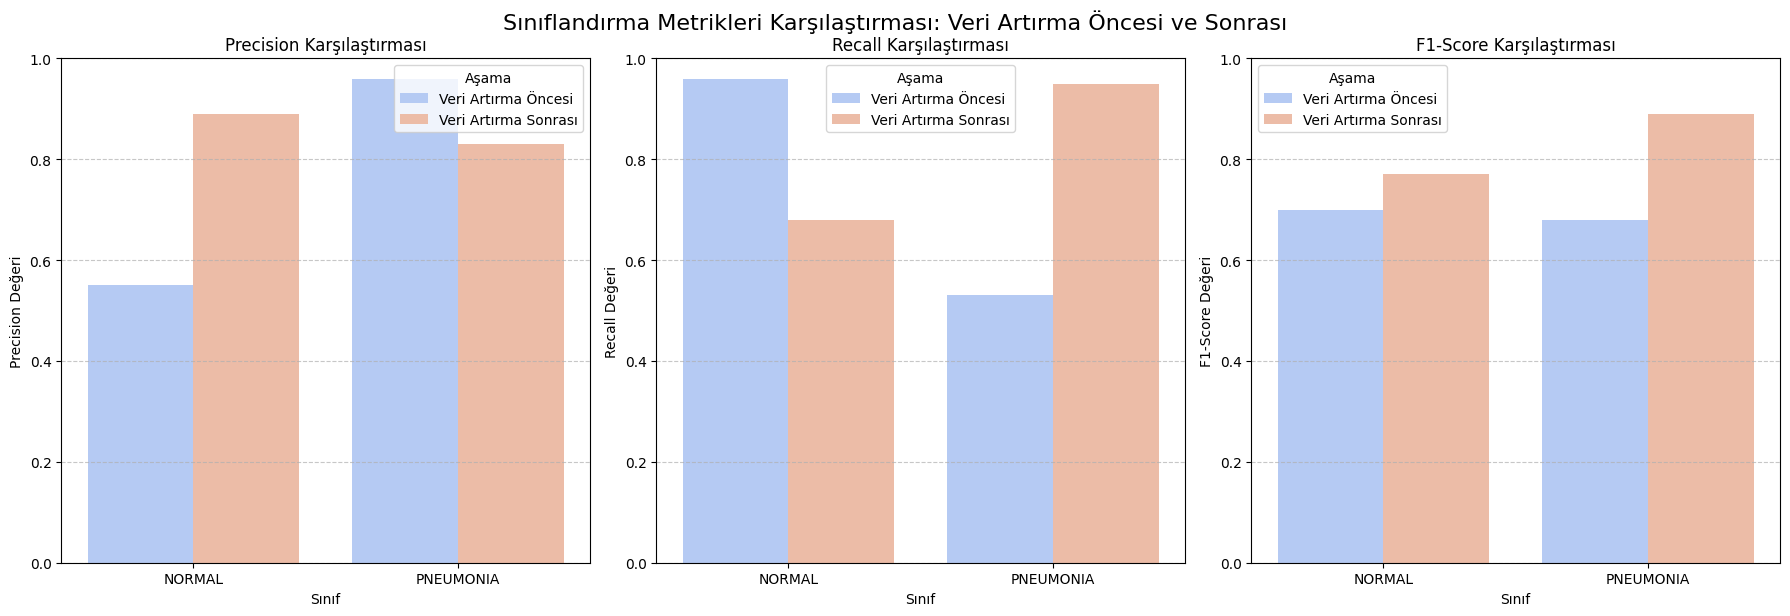

✅ Veri artırma öncesi ve sonrası metrik karşılaştırmaları görselleştirildi.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Önceki metrikler (veri artırma öncesi)
# df_metrics is already available from previous execution
# Original values from df_metrics:
# NORMAL: P=0.55, R=0.96, F1=0.70
# PNEUMONIA: P=0.96, R=0.53, F1=0.68

# Yeni metrikler (veri artırma sonrası, son sınıflandırma raporundan)
new_metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Precision', 'Recall', 'F1-Score'],
    'Class': ['NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA'],
    'Value': [0.89, 0.68, 0.77, 0.83, 0.95, 0.89]
}
df_new_metrics = pd.DataFrame(new_metrics_data)

# 'Stage' sütunu ekleyerek önceki ve yeni verileri ayırt etme
df_metrics['Stage'] = 'Veri Artırma Öncesi'
df_new_metrics['Stage'] = 'Veri Artırma Sonrası'

# İki DataFrame'i birleştirme
df_combined_metrics = pd.concat([df_metrics, df_new_metrics])

# Her bir metrik için karşılaştırmalı bar plot oluşturma
metrics_to_plot = ['Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(18, 6))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='Class', y='Value', hue='Stage', data=df_combined_metrics[df_combined_metrics['Metric'] == metric], palette='coolwarm')
    plt.title(f'{metric} Karşılaştırması')
    plt.ylabel(f'{metric} Değeri')
    plt.xlabel('Sınıf')
    plt.ylim(0, 1.0)
    plt.legend(title='Aşama')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('Sınıflandırma Metrikleri Karşılaştırması: Veri Artırma Öncesi ve Sonrası', y=1.02, fontsize=16)
plt.show()

print("✅ Veri artırma öncesi ve sonrası metrik karşılaştırmaları görselleştirildi.")